In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

%matplotlib inline
from DAG_generation import *

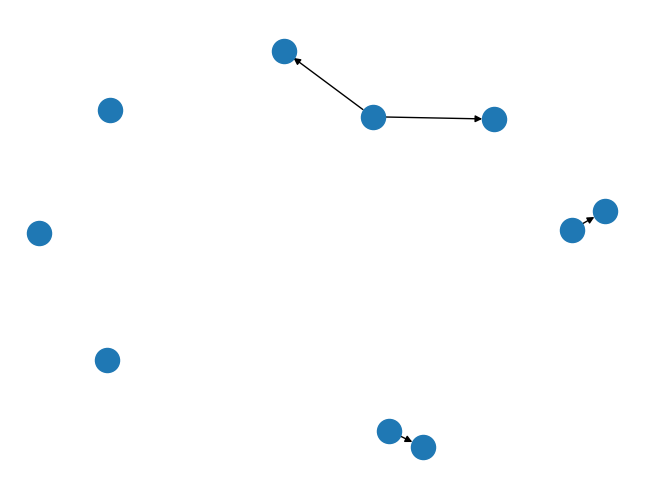

In [66]:
d = 10
prob = 0.1
w_range = (0.1, 0.4)
g_fu, adj = random_dag_generation(d, prob, 'er')

nx.draw(g_fu)

In [67]:
edge_labels = dict([((u, v), G.get_edge_data(u, v)['weight'])
                    for u, v in G.edges])
edge_labels

{(1, 0): 0.1468395629220159,
 (1, 5): 0.2508531683535966,
 (6, 1): 0.2387003058769361,
 (7, 1): -0.39910282043048406,
 (7, 5): 0.30064073537273633,
 (7, 9): 0.1395328441238869,
 (9, 2): 0.3084077871921247}

In [68]:
edge_labels

{(1, 0): 0.1468395629220159,
 (1, 5): 0.2508531683535966,
 (6, 1): 0.2387003058769361,
 (7, 1): -0.39910282043048406,
 (7, 5): 0.30064073537273633,
 (7, 9): 0.1395328441238869,
 (9, 2): 0.3084077871921247}

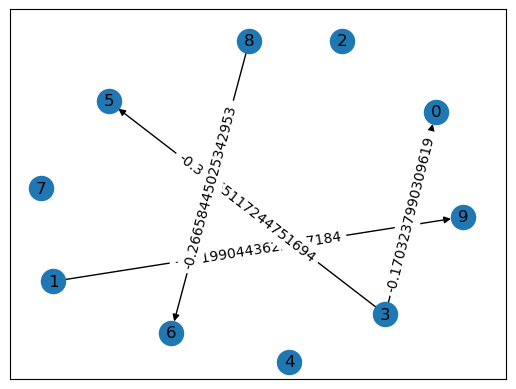

In [71]:
# random permutation
P = np.random.permutation(np.eye(d, d))  # permutes first axis only
B_perm = P.T.dot(adj).dot(P)

B_perm
U = np.random.uniform(low=w_range[0], high=w_range[1], size=[d, d])
U[np.random.rand(d, d) < 0.5] *= -1
W = (B_perm != 0).astype(float) * U
G = nx.DiGraph(W)
pos = nx.spring_layout(G)


nx.draw_networkx(G, pos)

edge_labels = nx.get_edge_attributes(G,'weight') # key is edge, pls check for your case


nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [28]:
G.edges

EdgeView([(0, 1), (0, 6), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 6), (4, 5), (4, 6), (5, 6)])